In [1]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv("trainDatasetClean.csv")

In [13]:
data_X = data.drop(['Unnamed: 0','Loan_Status'],axis=1)
data_y = data['Loan_Status']


In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(data_X,data_y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

[9.390e+01 1.134e+04 3.952e+01 3.779e+00 2.353e-03 7.684e-01 1.996e+00
 3.842e-01 4.368e-02 1.007e-02 3.174e+00 1.698e+00 9.884e-01 3.541e+00
 1.123e-03 7.285e-03 4.411e+00 7.103e+00 7.839e-01 1.424e+02 2.737e+01]


In [15]:
data_test = data_X

data_test.loc[data_test['Dependents_2'] == 1, 'Dependents_1'] = 1
data_test.loc[data_test['Dependents_3+'] == 1, 'Dependents_1'] = 1

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



testchi=data_test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Dependents_0','Dependents_3+','Dependents_2', 'Gender_Female', 'Gender_Male', 'Married_No','Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(testchi, data_y, test_size=0.3, random_state=0)
Dtree = DecisionTreeClassifier(criterion = 'entropy').fit(X_train,y_train)
y_pred = Dtree.predict(X_test)
print("The prediction accuracy is: ",Dtree.score(X_test,y_test)*100,"%")

The prediction accuracy is:  81.62162162162161 %


In [17]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 21  30]
 [  4 130]]
              precision    recall  f1-score   support

           N       0.84      0.41      0.55        51
           Y       0.81      0.97      0.88       134

    accuracy                           0.82       185
   macro avg       0.83      0.69      0.72       185
weighted avg       0.82      0.82      0.79       185



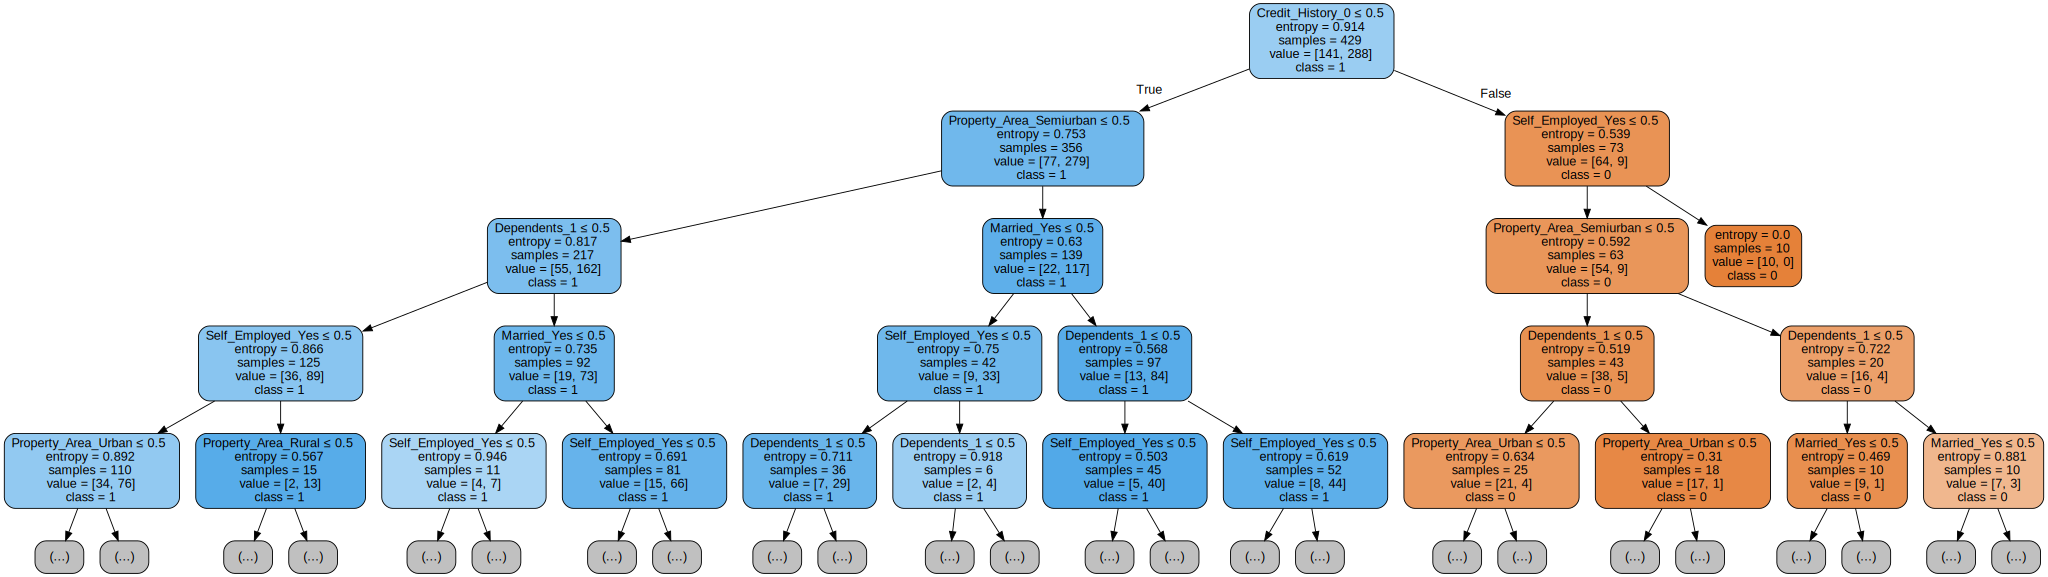

In [18]:
import graphviz 
import matplotlib.pyplot as plt

from sklearn import tree
dot_data = tree.export_graphviz(Dtree, out_file=None, 
                      feature_names=testchi.columns,max_depth=4,  
                      class_names=['0','1'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
from IPython.display import SVG
SVG(graph.pipe(format='svg'))


In [19]:
testchi.describe()


,Dependents_1,Married_Yes,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0,Credit_History_1
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.413681,0.651466,0.133550,0.291531,0.379479,0.328990,0.161238,0.838762
std,0.492894,0.476895,0.340446,0.454838,0.485653,0.470229,0.368050,0.368050
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
